<a href="https://colab.research.google.com/github/snmahsa/Classification/blob/main/KNN_in_adult_income.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score





```
 **Target filed: Income
-- The income is divide into two classes: <=50K and >50K**
```



In [68]:
#Read CSV file
data = pd.read_csv('/content/drive/MyDrive/Adult income/adult.csv')

In [3]:
#show data
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K





---


Workclass" is a categorical feature used in the
field of machine learning and data mining. It represents the type of organization or occupation that a person is employed in. The possible values for workclass include:
  Private: employee of a private company
  Self-emp-not-inc: self-employed individuals such as small business owners like a pharmacy or a small shop
  Self-emp-inc: self-employed individuals with higher income such as large corporations
  Federal-gov: federal government employee
  Local-gov: local government employee
  State-gov: state government employee
  Without-pay: individual without income
  Never-worked: individual who has never worked before

  This feature is important in income prediction models, as the type of occupation and organization that a person is employed in can have an impact on their income.





---

 Weighting data in a sample is commonly used to provide a better estimate of the population. For example, if a particular group with a smaller number of individuals from the population is underrepresented in the sample, it may also be underrepresented in the final estimate. Therefore, by assigning a weight to each individual in the sample, a better estimate for features such as income, education, age, and gender can be obtained.

In machine learning models, fnlwgt is also used as one of the input features in predicting income and other demographic features of the population.





---

Capital-gain" is a feature in financial and economic datasets that represents the profit earned by an individual or business through the sale of a capital asset such as stocks, bonds, or real estate. Capital gain is calculated as the difference between the sale price of the asset and its original purchase price.

In machine learning models, capital gain is often used as a predictor of income, as individuals with higher capital gains tend to have higher incomes. This feature can also be used to predict other financial behaviors, such as investment decisions and risk-taking behavior.Capital gain is an important feature in financial analysis and modeling, as it can provide insights into the overall financial health and performance of individuals and businesses.

---



# Get more Information

In [ ]:
data.shape

(48842, 15)

In [69]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [70]:
#print categorical columns values
print('workclass',data.workclass.unique())
print('education',data.education.unique())
print('marital-status',data['marital-status'].unique())
print('occupation',data.occupation.unique())
print('relationship',data.relationship.unique())
print('race',data.race.unique())
print('gender',data.gender.unique())
print('native-country',data['native-country'].unique())
print('predclass',data.income.unique())

workclass ['Private' 'Local-gov' '?' 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
education ['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Masters' 'Doctorate' '5th-6th' 'Assoc-voc' '9th'
 '12th' '1st-4th' 'Preschool']
marital-status ['Never-married' 'Married-civ-spouse' 'Widowed' 'Divorced' 'Separated'
 'Married-spouse-absent' 'Married-AF-spouse']
occupation ['Machine-op-inspct' 'Farming-fishing' 'Protective-serv' '?'
 'Other-service' 'Prof-specialty' 'Craft-repair' 'Adm-clerical'
 'Exec-managerial' 'Tech-support' 'Sales' 'Priv-house-serv'
 'Transport-moving' 'Handlers-cleaners' 'Armed-Forces']
relationship ['Own-child' 'Husband' 'Not-in-family' 'Unmarried' 'Wife' 'Other-relative']
race ['Black' 'White' 'Asian-Pac-Islander' 'Other' 'Amer-Indian-Eskimo']
gender ['Male' 'Female']
native-country ['United-States' '?' 'Peru' 'Guatemala' 'Mexico' 'Dominican-Republic'
 'Ireland' 'Germany' 'Philippines' 

In [71]:
#seperate 
non_numeric_columns = data.select_dtypes(include=['object']).columns
numeric_columns = data.select_dtypes(exclude=['object']).columns

In [ ]:
#Get more index
data.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


# Preprocess

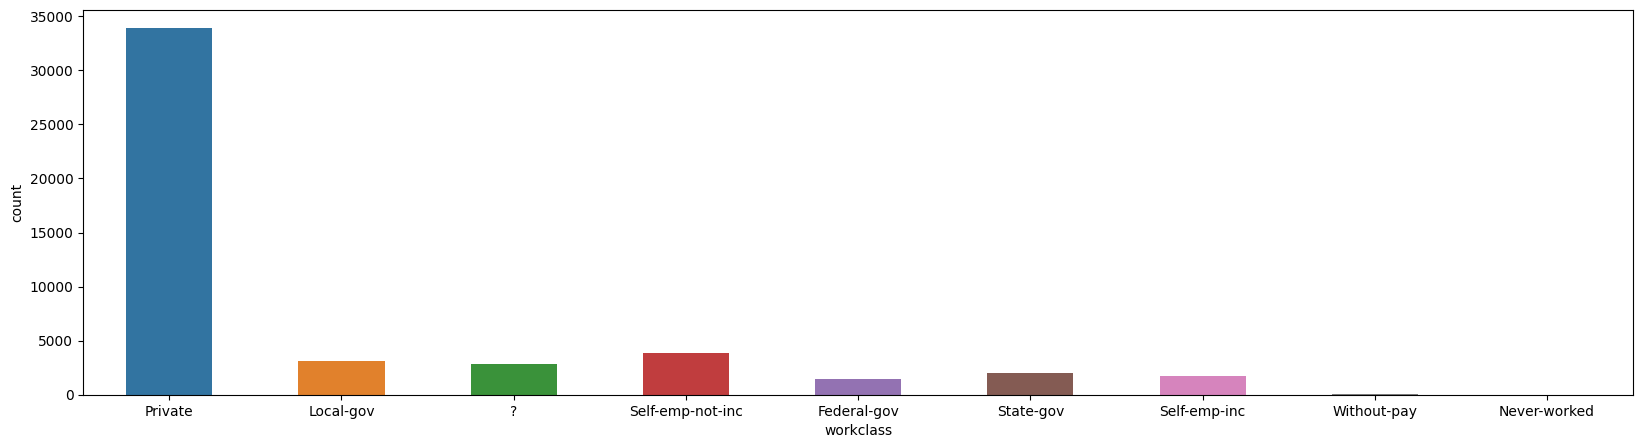

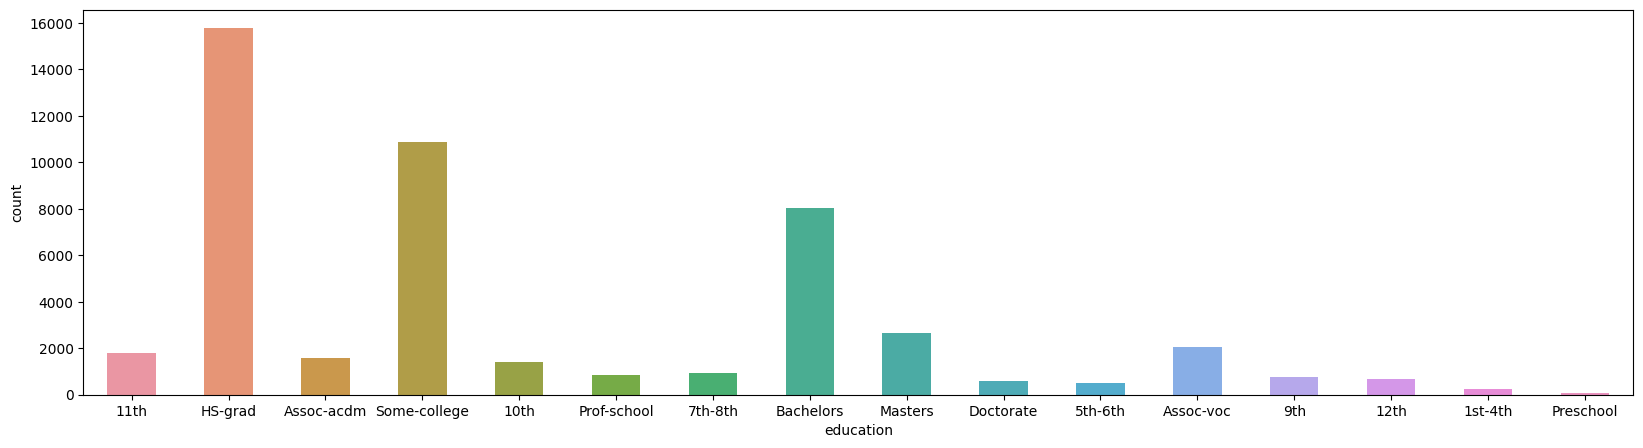

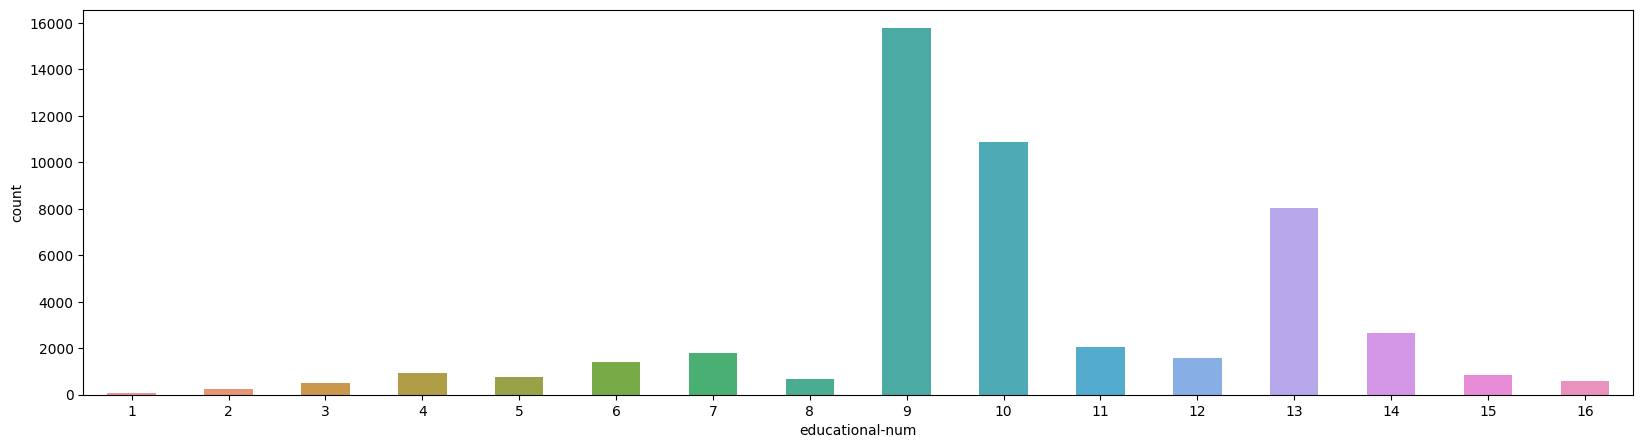

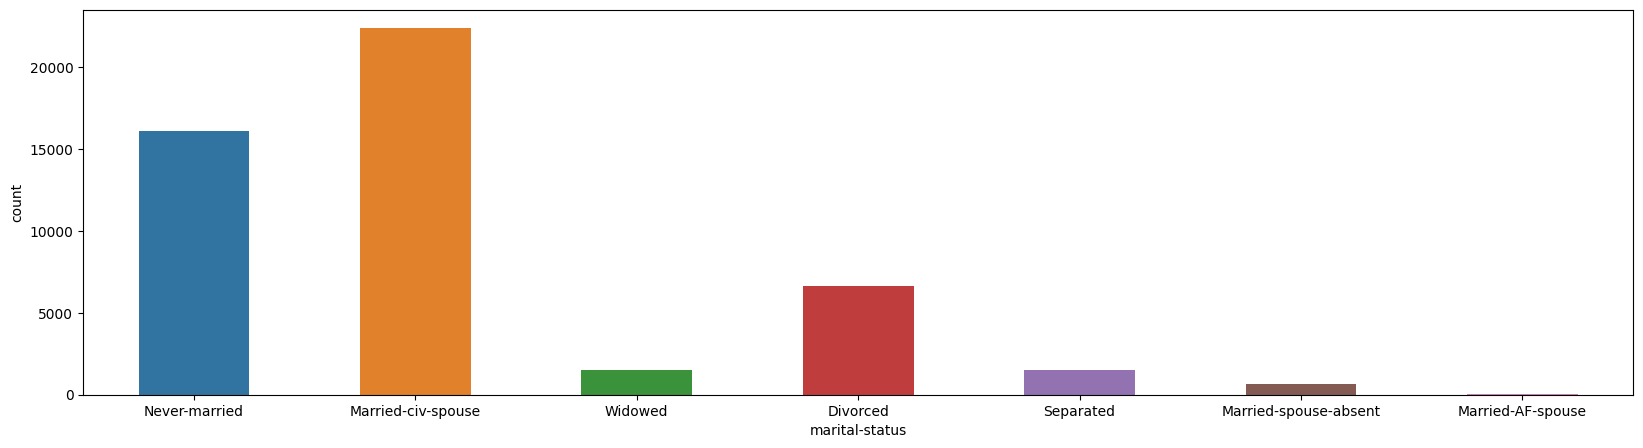

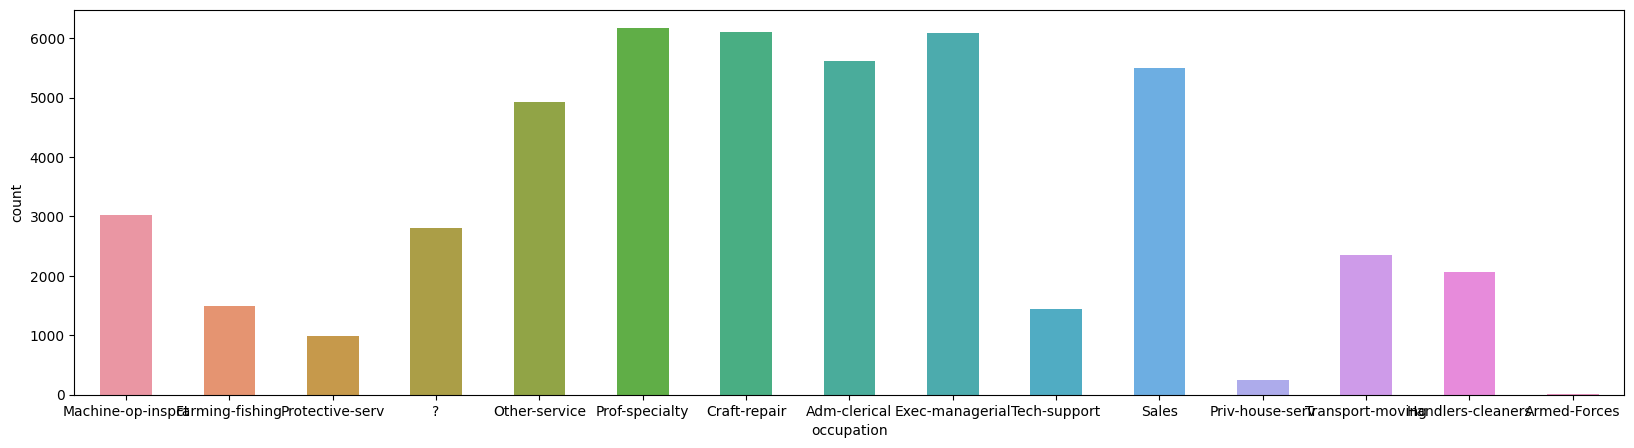

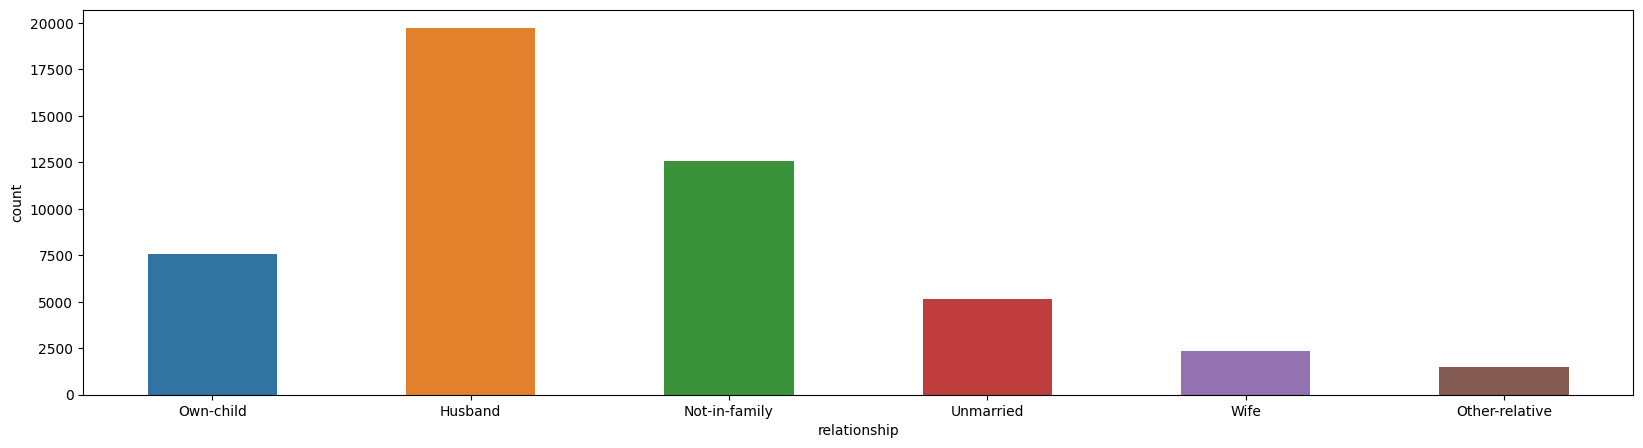

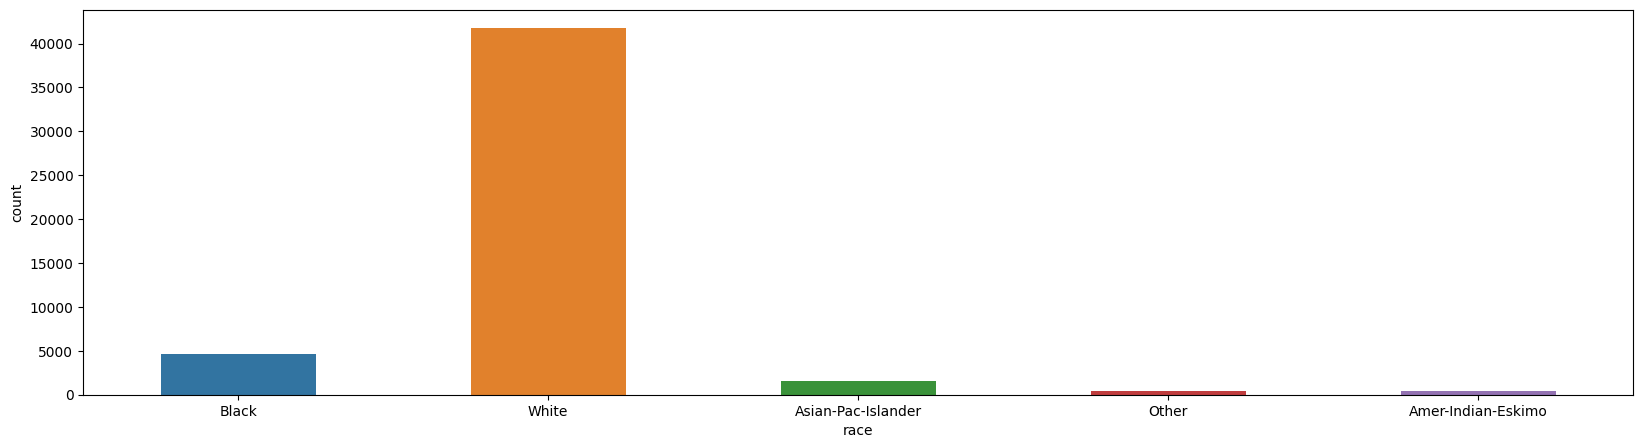

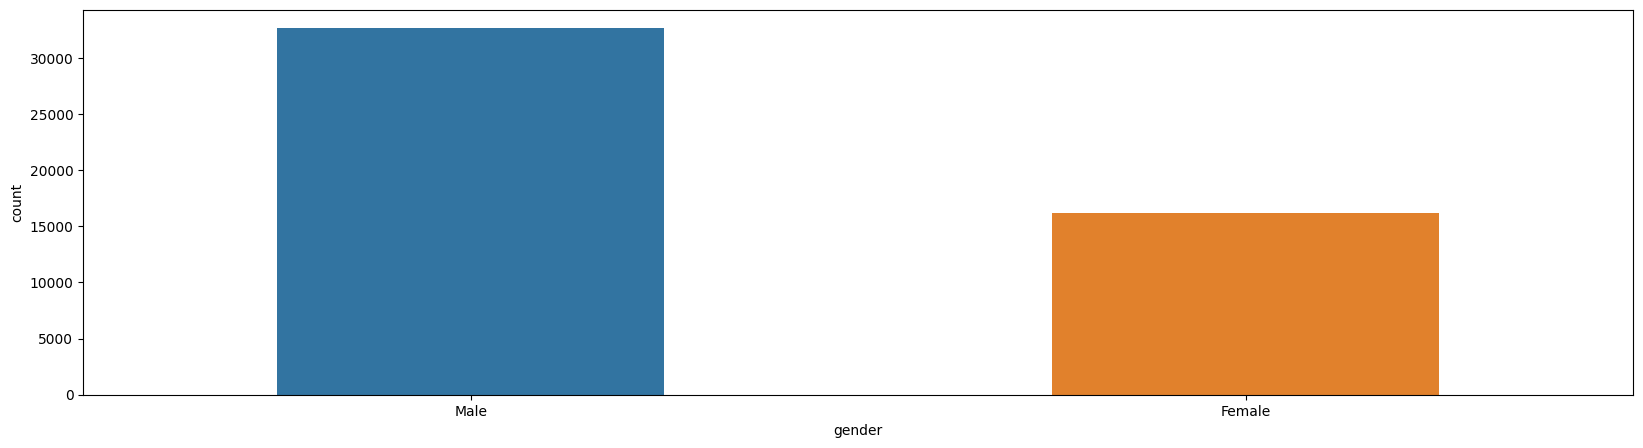

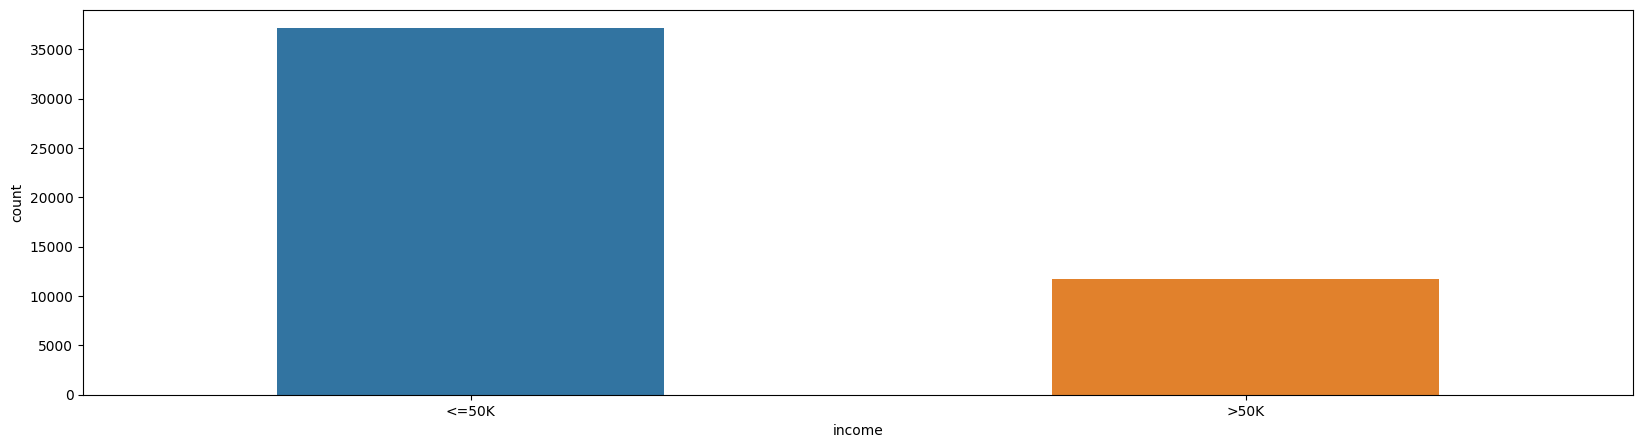

In [42]:
#Plotting for columns with values ​​less than 20
for col in data.columns:
  if len(data[col].unique()) <20 :
    plt.figure(figsize=(20,5))
    sns.countplot(x=col, data=data,width=0.5)
plt.show()

In [72]:
#Limit categorization
data['education'].replace('Preschool', 'dropout',inplace=True)
data['education'].replace('10th', 'dropout',inplace=True)
data['education'].replace('11th', 'dropout',inplace=True)
data['education'].replace('12th', 'dropout',inplace=True)
data['education'].replace('1st-4th', 'dropout',inplace=True)
data['education'].replace('5th-6th', 'dropout',inplace=True)
data['education'].replace('7th-8th', 'dropout',inplace=True)
data['education'].replace('9th', 'dropout',inplace=True)
data['education'].replace('HS-Grad', 'HighGrad',inplace=True)
data['education'].replace('HS-grad', 'HighGrad',inplace=True)
data['education'].replace('Some-college', 'CommunityCollege',inplace=True)
data['education'].replace('Assoc-acdm', 'CommunityCollege',inplace=True)
data['education'].replace('Assoc-voc', 'CommunityCollege',inplace=True)
data['education'].replace('Bachelors', 'Bachelors',inplace=True)
data['education'].replace('Masters', 'Masters',inplace=True)
data['education'].replace('Prof-school', 'Masters',inplace=True)
data['education'].replace('Doctorate', 'Doctorate',inplace=True)

In [73]:
#Limit categorization
data['marital-status'].replace('Never-married', 'NotMarried',inplace=True)
data['marital-status'].replace(['Married-AF-spouse'], 'Married',inplace=True)
data['marital-status'].replace(['Married-civ-spouse'], 'Married',inplace=True)
data['marital-status'].replace(['Married-spouse-absent'], 'NotMarried',inplace=True)
data['marital-status'].replace(['Separated'], 'Separated',inplace=True)
data['marital-status'].replace(['Divorced'], 'Separated',inplace=True)
data['marital-status'].replace(['Widowed'], 'Widowed',inplace=True)

In [74]:
#replace ? to nan
data.replace('?', np.nan, inplace=True)

In [75]:
data.isna().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [76]:
df = data

In [77]:
#drop beacuse they have nan
df['occupation'].dropna(inplace=True)
df['workclass'].dropna(inplace=True)


In [78]:
#drop educational-num beacuse its not important
df = df.drop(['educational-num'],axis=1)

In [79]:
#Encoder cetegorical columns
lb=LabelEncoder()
df.workclass=lb.fit_transform(df.workclass)
df.education=lb.fit_transform(df.education)
df['marital-status']=lb.fit_transform(df['marital-status'])
df.occupation=lb.fit_transform(df.occupation)
df.relationship=lb.fit_transform(df.relationship)
df.race=lb.fit_transform(df.race)
df.gender=lb.fit_transform(df.gender)
df['native-country']=lb.fit_transform(df['native-country'])
df.income=lb.fit_transform(df.income)


In [81]:
df.head()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,3,226802,5,1,6,3,2,1,0,0,40,38,0
1,38,3,89814,3,0,4,0,4,1,0,0,50,38,0
2,28,1,336951,1,0,10,0,4,1,0,0,40,38,1
3,44,3,160323,1,0,6,0,2,1,7688,0,40,38,1
4,18,8,103497,1,1,14,3,4,0,0,0,30,38,0


In [80]:
#scaler 
st=StandardScaler()
df_scalered=st.fit_transform(df)

# Model

In [82]:
#X
X = df.drop('income',axis=1)

In [83]:
#y
y = df['income']

In [84]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X, y, random_state=0, test_size=0.2)

In [85]:
#find best k
k_range = range(1, 11)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())

print(k_scores)

[0.7391999946349996, 0.7886860611425607, 0.7632570706930993, 0.7924943646540371, 0.7794523256856932, 0.7946850619112645, 0.7866182056253705, 0.7956472747056166, 0.7912657921716264, 0.7971009382882464]


In [86]:
#creat model
knn=KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [87]:
#pred
y_pred=knn.predict(X_test)

In [88]:
#Acuracy
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, knn.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Train set Accuracy:  0.8132469992066133
Test set Accuracy:  0.7963967652779199


In [89]:
#mae
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

0.20360323472208006

# another df1

In [90]:
#drop fnlwgt and native-country columns
df1 = df.drop(['fnlwgt', 'native-country'], axis=1)

In [91]:
#X and y
X1 = df1.drop('income',axis=1)
y1 = df1['income']

In [92]:
#split
X_train1,X_test1,y_train1,y_test1=train_test_split(X1, y1, random_state=0, test_size=0.2)

In [93]:
#find best k
k_range = range(1, 11)
k_scores1 = []

for k in k_range:
    knn1 = KNeighborsClassifier(n_neighbors=k)
    scores1 = cross_val_score(knn1, X1, y1, cv=10, scoring='accuracy')
    k_scores1.append(scores1.mean())

print(k_scores1)

[0.817697995753267, 0.8392570983563818, 0.8374348927880145, 0.8429017064892192, 0.84085415414484, 0.84619801712944, 0.8433725900460803, 0.8453994368426304, 0.8456041702817547, 0.8467098465358445]


In [94]:
#creat model
knn1=KNeighborsClassifier(n_neighbors=10)
knn1.fit(X_train1, y_train1)

KNeighborsClassifier(n_neighbors=10)

In [95]:
#pred
y_pred1=knn1.predict(X_test1)

from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train1, knn1.predict(X_train1)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test1, y_pred1))

Train set Accuracy:  0.8714457553809536
Test set Accuracy:  0.8463507011976661
